In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import torch.autograd as autograd
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from logReg import LogitReg
from torch.nn import Parameter
from influence import *
from util import *
import hessian as hess
from pathlib import Path

In [ ]:
'''training_data = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True),shuffle=True)
test_data =  torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True),shuffle=True)



X_train = training_data.dataset.train_data.data.reshape(-1,784).type(torch.FloatTensor)/255
y_train = training_data.dataset.train_labels.data
X_test = test_data.dataset.test_data.data.reshape(-1,784).type(torch.FloatTensor)/255
y_test = test_data.dataset.test_labels


np.savez("../data/training_data.npz", X=X_train, Y= y_train)
np.savez("../data/test_data.npz", X=X_test, Y= y_test)'''

X_train = torch.from_numpy(np.load("../data/training_data.npz")["X"])
y_train = torch.from_numpy(np.load("../data/training_data.npz")["Y"])
X_test = torch.from_numpy(np.load("../data/test_data.npz")["X"])
y_test = torch.from_numpy(np.load("../data/test_data.npz")["Y"])



max_iter = 100
D_in = X_train.shape[1]
D_out = 10
N = X_train.shape[0]
weight_decay = 0.01

cls = LogitReg(max_iter, D_in, D_out, N, weight_decay)
cls.fit(X_train,y_train)
print("Training loss {}".format(cls.loss_fn(X_train, y_train)))
print( "Training accuracy {}". format( cls.score(X_train,y_train)))
print( "Test loss {}". format( cls.loss_fn(X_test,y_test)))
print( "Test accuracy {}". format( cls.score(X_test,y_test)))


LBFGS training took [67] iter.
After training with LBFGS: 
Training loss 0.41001251339912415
a 53993.0 b 60000
Training accuracy 0.8998833298683167
Test loss 0.3923059105873108
a 9056.0 b 10000
Test accuracy 0.9056000113487244


Epsilon: 0.01

original_prediction tensor([1]) original label tensor([8])
perturbed_prediction tensor([8]) original label tensor([8])
original_image


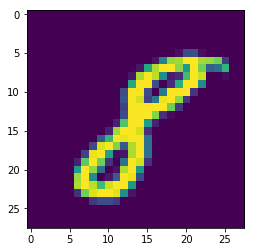

Perturbed_image


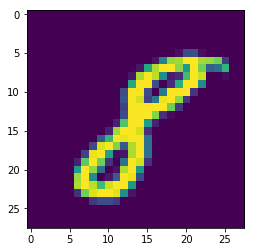

         Current function value: -1.856045
         Iterations: 7
         Function evaluations: 107
         Gradient evaluations: 102
         Hessian evaluations: 74
torch.Size([60000, 784])
LBFGS training took [66] iter.
After training with LBFGS: 
original_prediction on retrained model {} original label {} tensor([1]) tensor([8])
perturbed_prediction on retrained model {} original label {} tensor([8]) tensor([8])
Saving_Results at i 0
Predicted params diff 0.0002868695301003754 actual params diff 0.005796543788164854
Predicted loss diff -0.0005199935913085937 actual loss diff 0.00015044212341308594
         Current function value: -2.574281
         Iterations: 8
         Function evaluations: 133
         Gradient evaluations: 128
         Hessian evaluations: 88
torch.Size([60000, 784])
LBFGS training took [67] iter.
After training with LBFGS: 
         Current function value: -2.027247
         Iterations: 7
         Function evaluations: 74
         Gradient evaluations: 70
  

LBFGS training took [65] iter.
After training with LBFGS: 
         Current function value: -1.128867
         Iterations: 10
         Function evaluations: 103
         Gradient evaluations: 101
         Hessian evaluations: 120
torch.Size([60000, 784])
LBFGS training took [62] iter.
After training with LBFGS: 
         Current function value: -2.603727
         Iterations: 10
         Function evaluations: 72
         Gradient evaluations: 70
         Hessian evaluations: 118
torch.Size([60000, 784])
LBFGS training took [68] iter.
After training with LBFGS: 
         Current function value: -2.220172
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 86
         Hessian evaluations: 114
torch.Size([60000, 784])
LBFGS training took [67] iter.
After training with LBFGS: 
         Current function value: -1.282237
         Iterations: 9
         Function evaluations: 147
         Gradient evaluations: 141
         Hessian evaluations: 118
torch.Size(

LBFGS training took [64] iter.
After training with LBFGS: 
         Current function value: -1.715480
         Iterations: 9
         Function evaluations: 88
         Gradient evaluations: 85
         Hessian evaluations: 111
torch.Size([60000, 784])
LBFGS training took [67] iter.
After training with LBFGS: 
         Current function value: -1.920600
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 81
         Hessian evaluations: 83
torch.Size([60000, 784])
LBFGS training took [67] iter.
After training with LBFGS: 
         Current function value: -1.398752
         Iterations: 8
         Function evaluations: 157
         Gradient evaluations: 151
         Hessian evaluations: 100
torch.Size([60000, 784])
LBFGS training took [67] iter.
After training with LBFGS: 
         Current function value: -1.226626
         Iterations: 10
         Function evaluations: 144
         Gradient evaluations: 139
         Hessian evaluations: 123
torch.Size([6

LBFGS training took [66] iter.
After training with LBFGS: 
         Current function value: -2.240926
         Iterations: 9
         Function evaluations: 163
         Gradient evaluations: 157
         Hessian evaluations: 90
torch.Size([60000, 784])
LBFGS training took [65] iter.
After training with LBFGS: 
         Current function value: -1.402827
         Iterations: 11
         Function evaluations: 155
         Gradient evaluations: 153
         Hessian evaluations: 155
torch.Size([60000, 784])
LBFGS training took [64] iter.
After training with LBFGS: 
         Current function value: -1.796857
         Iterations: 8
         Function evaluations: 73
         Gradient evaluations: 70
         Hessian evaluations: 92
torch.Size([60000, 784])
LBFGS training took [65] iter.
After training with LBFGS: 
Optimization terminated successfully.
         Current function value: -1.566937
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 25
         

In [ ]:
epsilon = 0.01
while( epsilon <= 0.25):
    influence_perurbation(cls, X_train, y_train, X_test, y_test, num_to_remove=500, verify_influence=True, 
                      epsilon =epsilon, weight = 1, load_refresh=True)
    epsilon += 0.05

In [ ]:
def influence_perurbation_k_leave_out( model, X_train, y_train, X_test, y_test, num_to_remove=5, random_seed=7, 
                                      verify_influence = False, epsilon = 0.25, weight = 0):
        test_idx = 8
        N = model.num_train_examples
        actual_params_diff = np.zeros(n_trials)
        predicted_params_diff = np.zeros(n_trials)
        
        for trial in range(n_trials):
            indices_to_remove = np.random.choice(N, num_to_remove)
           
            X_pert = torch.zeros(num_to_remove, X_train.shape)
            for i in range(num_to_remove):
                tr_idx = indices_to_remove[i]
                X_tr, y_tr, X_te, y_te = split_data( tr_idx, test_idx, X_train, y_train, X_test, y_test)

                h = hess.Hessian( model, X_train, y_train )
                h.initialize(X_train, y_train)
                train_grad, train_loss = h.get_loss_gradient(X_tr, y_tr)

                X_pert[i,:] = perturbation( model, X_tr, y_tr, epsilon=epsilon, weight=weight )

            X_tr, y_tr, X_te, y_te = split_data( indices_to_remove, test_idx, X_train, y_train, X_test, y_test)

            all_train_grad, train_loss = h.get_loss_gradient(X_tr, y_tr)
            perturb_train_grad, pert_train_loss = h.get_loss_gradient(X_pert, y_tr)

            diff_v = perturb_train_grad - train_grad

            filename = "../data/perturbation/hp_inv_pert_k" + str(num_to_remove) +".npz"
            my_file = Path(filename)

            if my_file.is_file() and load_refresh == False:
                print( "Loading hvp inverse from file {}".format(filename))
                hvp = np.load(filename)["h"].item()[0]
            else:
                v = diff_v.detach().numpy()
                print("Calculating HVP inverse")
                hvp = h.get_inverse_hvp_cg(v, max_iterations = 100)
                np.savez(filename, h = hvp)

            print("Removing original training point and adding perturbation\n")

            ans = np.linalg.norm(np.array(hvp)/N)
            print(ans)
            predicted_params_diff[trial] = ans

            if( verify_influence):
                cls_leave = LogitReg(model.iterations, model.D_in, model.D_out, N, model.weight_decay)
                X = X_train
                X[indices_to_remove, :] = X_pert.detach()
                cls_leave.fit( X, y_train)
                actual_difference = cls_leave.fc1.weight.view(-1) - model.fc1.weight.view(-1)
                actual_params_diff[trial] = torch.norm(actual_difference).detach().numpy()
                print( "Predicted loss {} actual loss {}".format(predicted_params_diff[trial], actual_params_diff[trial]))

        np.savez("../data/perturbation/loss_diffs_perturb.npz",r = {"predicted_loss":predicted_params_diff, "actual_loss": actual_params_diff})


In [ ]:
count = 10
while( count >=10 ):
    print("Leave-out-k-{}".format(count))
    influence_k_leave_out(cls, X_train, y_train, X_test, y_test, n_trials=1, k=count)
    count = count - 5

In [ ]:
K = np.load("../data/loss_diffs_75_8.npz")["r"]
plt.plot(K.item()['predicted_loss'], K.item()['actual_loss'])